# CS3237 Lab 4 - Neural Networks and Deep Learning

**Name:**

**Student Number:**

**Lab Group:**


## 1. Introduction

The objectives of this lab are:

    1. To familiarize you with how to encode input and output vectors for neural networks.
    2. To give you some insight into how hyperparameters like learning rate and momentum affect training.
    3. To create, test and train, a CNN deep learning model using the MNIST dataset.
    
To save time we will train each experiment only for 10 epochs. This will lead to less than optimal results but is enough for you to make observations.

## 2. The Irises Dataset

We will now work again on the Irises Dataset, which we used in Lab 3, for classifying iris flowers into one of three possible types. As before we will consider four factors:

    1. Sepal length in cm
    2. Sepal width in cm
    3. Petal length in cm
    4. Petal width in cm

In this dataset there are 150 sample points. The code below loads the dataset and prints the first 10 rows so we have an idea of what it looks like.

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

iris = load_iris()

print("First 10 rows of data:")
print(iris.data[:10])

First 10 rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


### 2.2 Scaling the Data

We make use of the MinMaxScaler to scale the inputs to between 0 and 1.  The code below does this and prints the first 10 rows again, to show us the difference.

In the next section we will investigate what happens if we use unscaled data.

In [2]:
scaler = MinMaxScaler()
scaler.fit(iris.data)
X = scaler.transform(iris.data)
Y = iris.target

print("First 10 rows of SCALED data.")
print(X[:10])

First 10 rows of SCALED data.
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]]


### 2.3 Encoding the Targets

In Lab 3 we saw that the target values (type of iris flower) is a vector from 0 to 2. We can see the 150 labels below:


In [3]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


We can use this to train the neural network, but we will use "one-hot" encoding, where we have a vector of _n_ integers consisting of 0's and 1's.  The table below shows how one-hot encoding works:

|   Value    |    One-Hot Encoding    |
|:----------:|:----------------------:|
| 0 | \[1 0 0\] |
| 1 | \[0 1 0\] |
| 2 | \[0 0 1\] |

Pytorch provides the one_hot function to create one-hot vectors:



In [5]:
import torch
import torch.nn.functional as F

temp = F.one_hot(torch.tensor(iris.target), 3)
print(temp, len(temp))

tensor([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 

Now let's split the data into training and testing data:



In [6]:
from torch.utils.data import TensorDataset, DataLoader

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 1)
train_x = torch.Tensor(train_x)
train_y = F.one_hot(torch.tensor(train_y), 3).to(torch.float32)

test_x = torch.Tensor(test_x)
test_y = F.one_hot(torch.tensor(test_y), 3).to(torch.float32)

train_dataset = TensorDataset(train_x, train_y)
test_dataset = TensorDataset(test_x, test_y)

train_loader = DataLoader(train_dataset)
test_loader = DataLoader(test_dataset)

### 2.4 Building our Neural Network

Let's now begin building a simple neural network with a single hidden layer, using the Stochastic Gradient Descent (SGD) optimizer, ReLu transfer functions for the hidden layer and softmax for the output layer.

The code to do this is shown below:

In [39]:
import torch.nn as nn
import torch.optim as optim

class ModelNN(nn.Module):
    def __init__(self):
        super(ModelNN, self).__init__()
        self.l1 = nn.Linear(4, 100)
        self.l2 = nn.Linear(100, 3)
    def forward(self, x):
        x = self.l1(x)
        x = F.relu(x)
        output = self.l2(x)
        return output

model = ModelNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1, momentum=1)

### 2.5 Training the Neural Network

As is usually the case, we can call the "fit" method to train the neural network for 10 epochs. You can increase this to a larger value if you want.

In [40]:
# Train the Model
num_epochs = 10
for epoch in range(num_epochs):
    for i, (data, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training complete!")

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for input, labels in train_loader:
        outputs = model(input)
        _, predicted = torch.max(outputs.data, 1)
        _, label = torch.max(labels, 1)
        total += input.size(dim = 0)
        correct += (predicted == label).sum().item()
    print(f'Training accuracy of the model: {100 * correct / total} %')

with torch.no_grad():
    correct = 0
    total = 0
    i = 0
    for input, labels in test_loader:
        outputs = model(input)
        _, predicted = torch.max(outputs.data, 1)
        _, label = torch.max(labels, 1)
        total += input.size(dim = 0)
        correct += (predicted == label).sum().item()
    print(f'Test accuracy of the model: {100 * correct / total} %')

Epoch [5/10], Loss: -0.0000
Epoch [10/10], Loss: -0.0000
Training complete!
Training accuracy of the model: 66.66666666666667 %
Test accuracy of the model: 53.333333333333336 %


---
#### Question 1

Run the code above. Do you see evidence of underfitting? Overfitting? Justify your answers. ***(4 MARKS)***

**Overfitting would mean that the model performed way better on the training data than the test data. In my results the training accuracy is 90% and the testing accuracy is 93.3% so there is no overfitting here. Since both accuracies are fairly high, the model also did not underfit. Underfitting would mean that it performed poorly for both metrics as it hasn't learned enough from the data.**

_(For TA) Marks awarded: ____ / 4_

---

#### Question 2a

Consult the documentation for the SGD optimizer [here](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html). What does the lr parameter do? ***(1 MARK)***

**lr stands for learning rate. The parameter controls, the step size the model makes in the gradient descent. A higher lr means bigger steps, which means a faster model. This can lead to a lower accuracy compared to a slower/ressource-heavier lower learning rate.**

#### Question 2b

The momentum parameter "accelerates gradient descent in the relevant direction and dampens oscillations". Using Google or other means, illustrate what this means. ***(2 MARKS)***

**Without momentum there is more oscillation between steps, which means less efficiency compared to an SGD with momentum. This image illustrates it well: 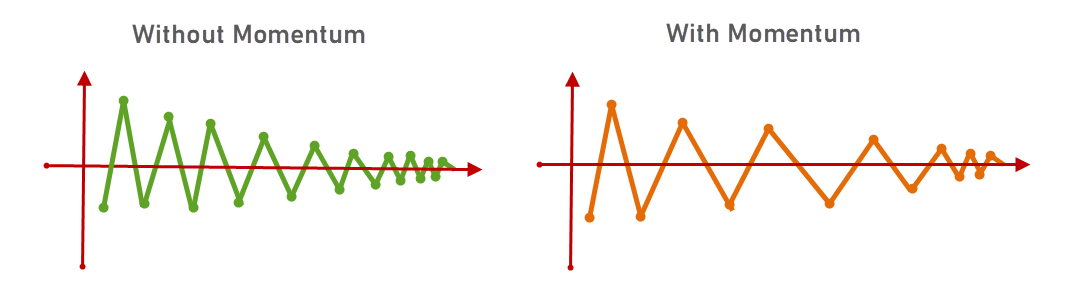**

_(For TA) Marks awarded: ____ / 3_

----

#### Question 3a

We will now play with the lr parameter. Adjust the lr parameter to the following values and record the final training and test accuracies in the respective columns. Also observe the sequence of accuracies over the training period, and place your observation in the "remarks" column, e.g. "Progresses steadily", "some oscillation" etc. ***(3 MARKS)***

**Answer: Fill the table below **

|  lr    | Training Acc. | Testing    Acc. |      Remarks      |
|:------:|---------------|-----------------|-------------------|
|0.01    |        95%       |   93.33%             |         Some oscillation in higher percentages          |
|0.1     |     88.33%         |    93.33%             |                   |
|1.0     |    69.16%           |     56.66%            |        Much faster with worse results           |
|10.0    |      69.16%         |       56.66%          |                   |
|100     |         32.5%      |        36.66%         |    Very inefficient learning, no good results after this               |
|1000    |        32.5%       |         36.66%        |                   |
|10000   |          32.5%     |          36.66%       |                   |
| 100000 |         32.5%      |         36.66%        |                   |


#### Question 3b

Based on your observations above, comment on the effect of small and very large learning rates on the learning. ***(2 MARKS)***

**Very small learning rates lead to a very high accuracy but take a lot of time. The very large learning rates are useless for actual training but only take a small fraction of the time of the small learning rates**

_(For TA) Marks awarded: ____ / 5_

### 2.5 Using Momentum

We will now experiment with the momentum term. To do this:

    1. Change the learning rate to 0.1.
    2. Set the momentum to 0.1. 
    
Run your neural network.

---

#### Question 4a

Keeping the learning rate at 0.1, complete the table below using the momentum values shown. Again record any observations in the "Remarks" column. ***(3 MARKS)***

**Answer: Fill the table below**

| momentum | Training Acc. | Testing    Acc. |      Remarks      |
|:--------:|---------------|-----------------|-------------------|
|0.001     |       89.16%        |     93.33%            |   Performs only slightly better than no momentum, is faster though                |
|0.01      |         87.5%      |         93.33%        |      Performs slightly worse for training than no momentum             |
|0.1       |      88.33%         |   93.33%              |    So far testing accuracy seems to be unchanged, no change as to no momentum               |
|1.0       |        66.66%       |       53.33%          |      Suddenly much worse results             |

#### Question 4b

Based on your observations above, does the momentum term help in learning? ***(2 MARKS)***

**It doesn't have a big positive impact on the pure numbers. In the best case, there was an improvement of less than 1% for the training accuracy. It can significantly worsen the results though, if the number is big enough. It speeds up the process a little bit, although that may be due to my hardware setup.**

_(For TA) Marks awarded: ____ / 5_

---


----
## 4. Creating a CNN for the MNIST Dataset

In this section we will now create a convolutional neural network (CNN) to classify images in the MNIST dataset that we used in Lecture 5. Let's build each part step by step.

### 4.1 Loading the MNIST Dataset

As in the Neural Network example from Lecture 5 we will load the MNIST dataset, scale the inputs to between 0 and 1, and convert the Y labels to one-hot vectors. However unlike before we will not flatten the 28x28 image to a 784 element vector, since CNNs can inherently handle 2D data. We will use a batch size of 1 for now, you may want to try other values for your training.

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

batch_size = 1

# Load the data, and normalise it.
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Change target to a one hot vector.
target_transform = transforms.Compose(
    [transforms.Lambda(lambda x: F.one_hot(torch.tensor(x), 10))])

training_set = datasets.MNIST('data', train=True, download=True, transform=transform, target_transform=target_transform)
test_set = datasets.MNIST('data', train=False, transform=transform, target_transform=target_transform)
train_loader = torch.utils.data.DataLoader(training_set, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = batch_size)

ModuleNotFoundError: No module named 'torchvision'

### 4.2 Create your CNN network

Create your CNN network using pytorch (Hint: you may look at the CNN example from lecture 6). You should minimally have two convolutional layers, two maxpool layers, and at least one dense (linear) layer for the output. Use activation functions between layers such as `relu` or `softmax`. Pay careful attention to the size of the inputs and outputs. 

Write your class in the cell below and implement both the `constructor` and the `forward` function.

In [ ]:
"""
    Enter your code for part 4.2 here in this code cell.
"""

### 4.3 Train your CNN network

Now train your network on the training dataset. You should train for 50 to 100 epochs.

You will have to decide on which optimizer to use (SGD, adam, for example), which loss function you will use, and any other hyperparameters such as learning rate, batch size, and momentum.

Write your code to train in the cell below.

In [ ]:
"""
    Enter your code for part 4.3 here in this code cell.
"""

### 4.4 Test your CNN network

Now test your network on the test dataset. Print out the accuracy of your model. 

Try modifying your model and choosing different hyperparameters and see if you can improve the accuracy of your model. 

Write your code to test in the cell below.

In [ ]:
"""
    Enter your code for part 4.4 here in this code cell.
"""

#### Question 5:

Complete the following table with your final design (you may add more rows for the # neurons (layer1) etc. to detail how many neurons you have in each hidden layer). Likewise you may replace the lr, momentum etc rows with parameters more appropriate to the optimizer that you have chosen. (4 MARKS)

| Hyperparameter       | What I used | Why?                  |
|:---------------------|:------------|:----------------------|
| Optimizer            |             |                       |
| Input shape          |             |                       |
| First layer          |             |                       |
| Second layer         |             |                       |
| Add more layers      |             |                       |
| if needed            |             |                       |
| Dense layer          |             |                       |
| learning rate?       |             |                       |
| momentum?            |             |                       |
| loss function?       |             |                       |

*FOR GRADER:* <br>
*TABLE: _____ / 4* <br>
*CODE: ______ / 10*<br>

***TOTAL: ______ / 14 ***

#### Question 6

What is the final training and test accuracy that you obtained after 100 epochs. Are there signs of underfitting or overfitting? Explain your answer (4 MARKS)

***Write your answer here***

*FOR GRADER: ______ / 4*

----

## 5 Conclusion

In this lab we saw how to create a simple Dense neural network to complete the relatively simple task of learning how to classify irises according to their sepal and petal characteristics. We then tried using a CNN on the MNIST dataset. 

---

***FOR TA ONLY***

| Question |  Marks  |
|:--------:|:-------:|
|1         |     /4  |
|2         |     /3  |
|3         |     /5  |
|4         |     /5  |
|5         |     /14 |
|6         |     /4  |
|Total:    |     /35 |

